In [1]:
library(dplyr)
library(performance)
library(tibble)
library(here)
library(emmeans)
library(car)
library(modelr)
library(vegan)
library(knitr)
library(ggpubr)
library(janitor)
library(factoextra)
library(dichromat)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /home/ecamo19/Documents/projects/nutrients_and_water_effects_2022/shade_house_reproducible_stats

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘modelr’


The following objects are masked from ‘package:performance’:

    mae, mse, rmse


Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘package:modelr’:

    permute


Loading required package: lattice

This is vegan 2.6-4

Loading required package: ggplot2


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
setwd(here::here())

In [3]:
# Load all joined dataset
source("./scripts/code_join_data_full_dataset.R")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:car’:

    some




In [4]:
# set plot dimensions
options(repr.plot.width = 15)
options(repr.plot.height = 10)

__For running each peice of code press shift + Enter__

# __Q3:How do functional traits, treatment, and N-fixing status interact to influence seedling-level growth rates and biomass accumulation?__


## Trait PCA

In [5]:
# Select variables that are going to be used in the model
data_for_models <-
    data_for_models %>%

    clean_names() %>%
    # Select columns needed for regression
    dplyr::select(spcode, treatment, nfixer, init_height,

                  # Performance measures
                  total_biomass, rgr, root_shoot_ratio,

                  # physiology traits
                  amax, gs, wue, pnue, sla,

                  # Leaf traits
                  narea_g_m2) %>%
    clean_names()

In [21]:
data_traits_scaled <-
    data_for_models %>%
        dplyr::select(-c(total_biomass, rgr, root_shoot_ratio, init_height)) %>%

        mutate(across(where(is.numeric), scale))


## PCA

In [22]:
pca_traits <- princomp(data_traits_scaled[,c(4:ncol(data_traits_scaled))])
#pca_final_traits <- princomp(all_trait_scaled[,c(9:15)])

In [17]:
eigs <- pca_traits$sdev^2/sum(pca_traits$sdev^2)

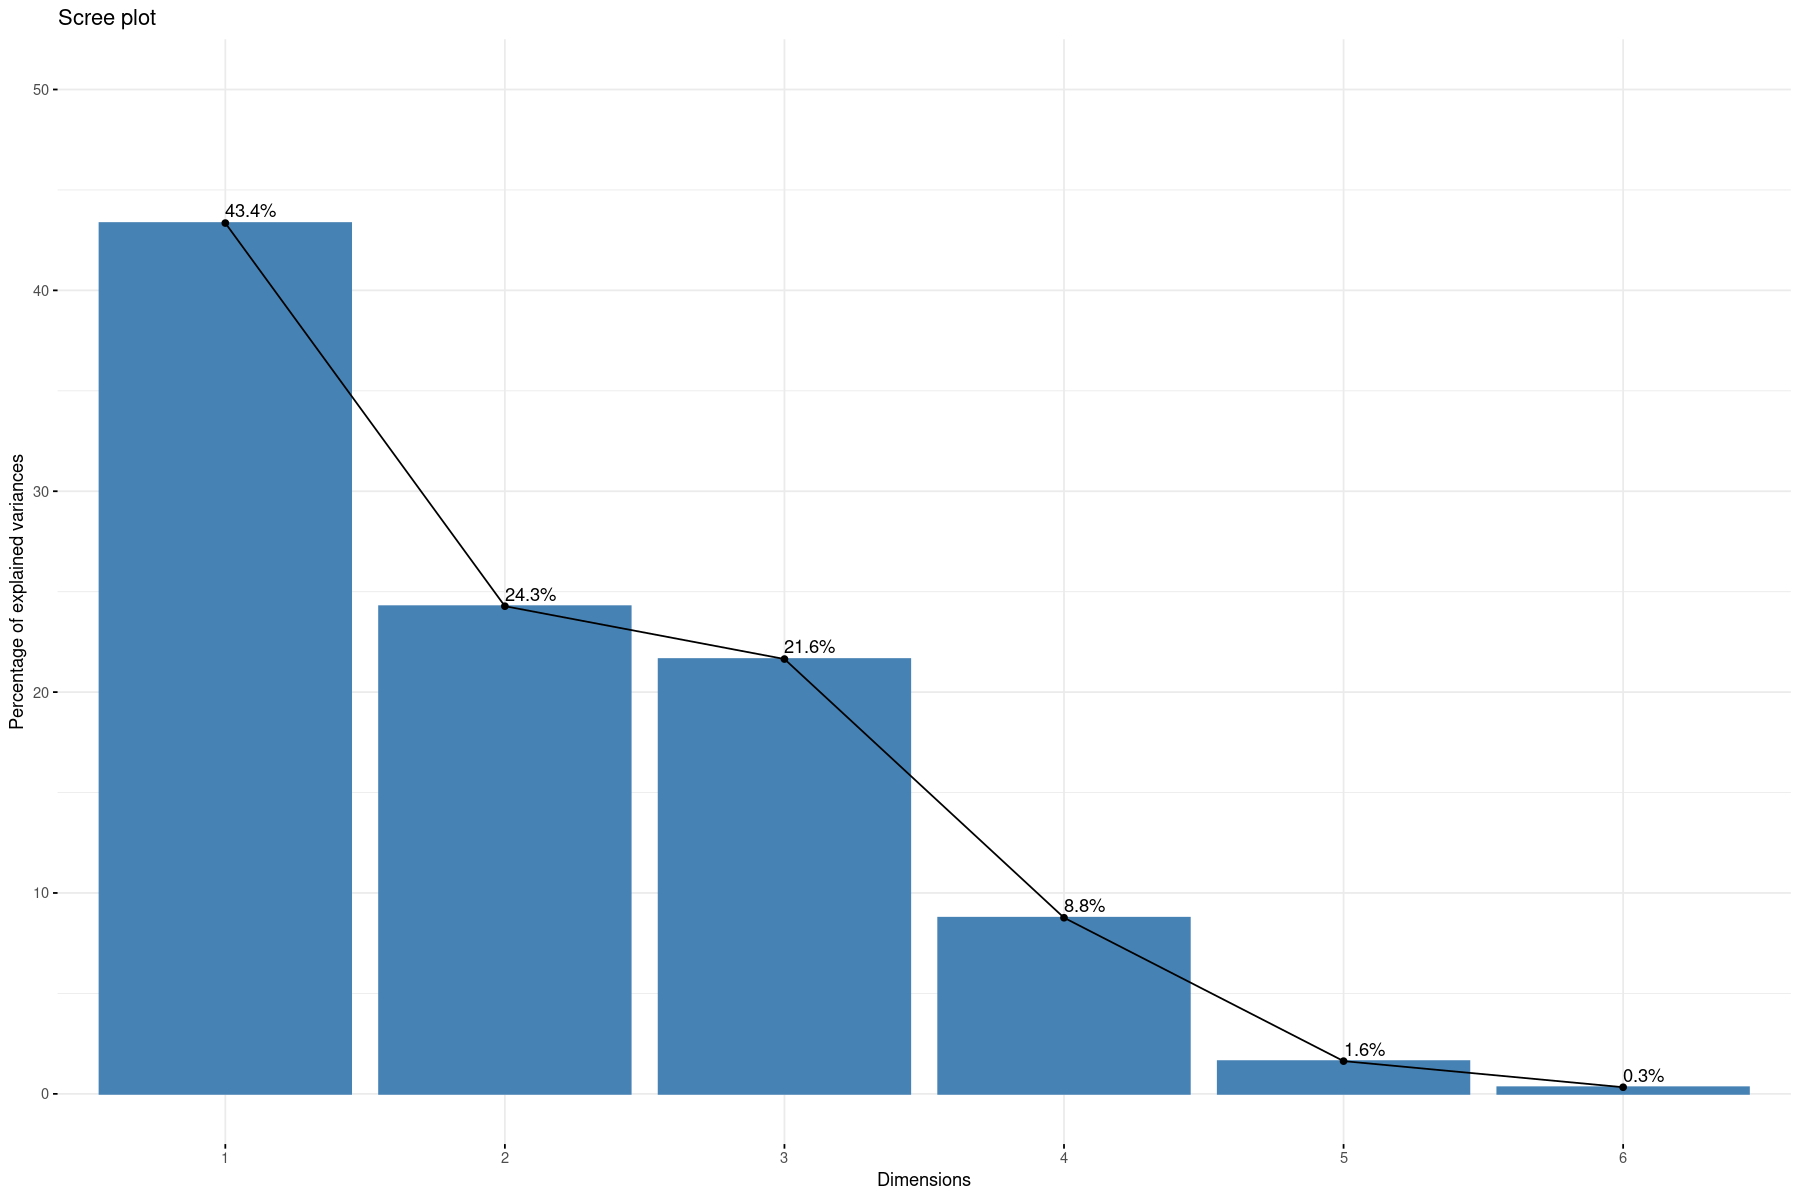

In [23]:
fviz_screeplot(pca_traits, addlabels = TRUE, ylim = c(0, 50))

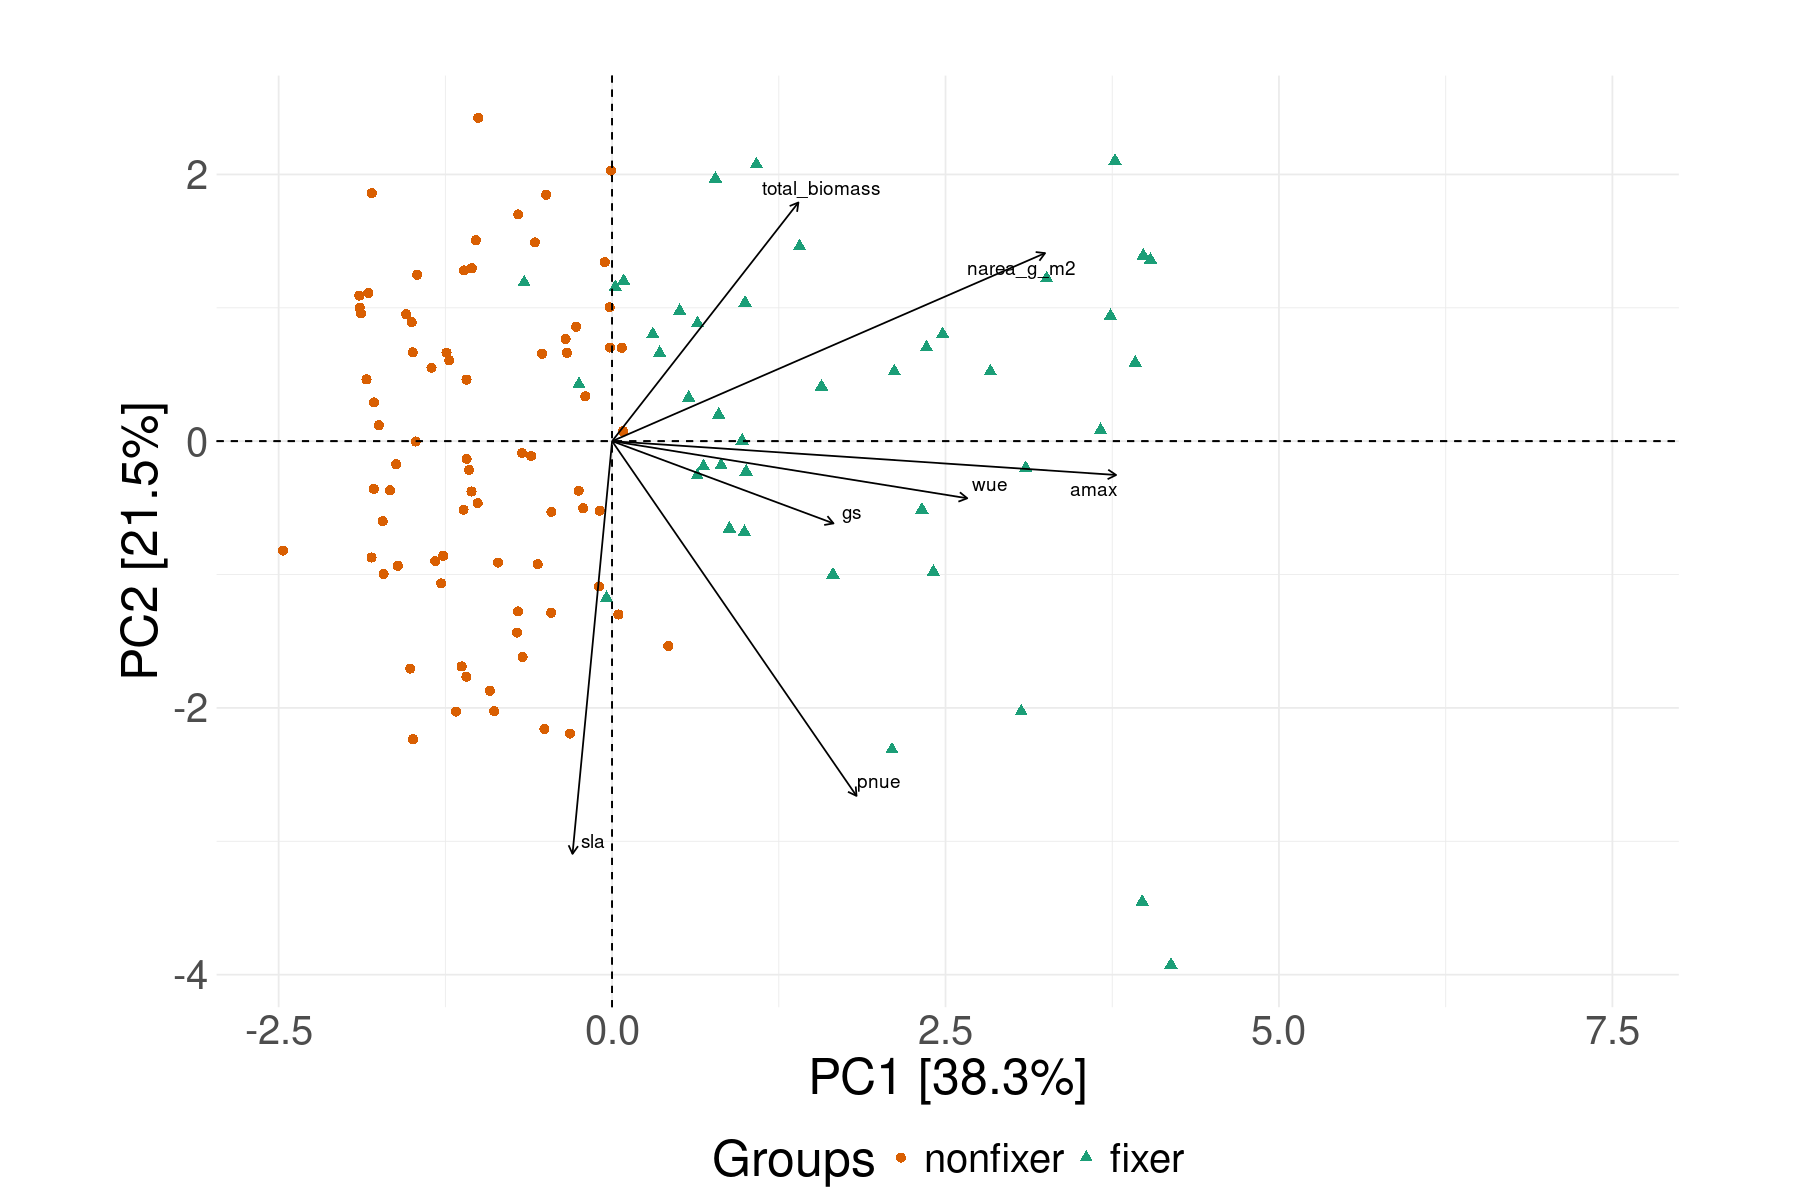

In [19]:
fviz_pca_biplot(pca_traits, axes = c(1, 2),

                invisible="quali",
                pointsize = 2.5,
                # Add group
                habillage= data_for_models$nfixer,

                # Set labels
                label ="var",

                # Set arrow color
                col.var = "black",
                geom=c("point", "arrows"),

                # Repel overlapping labels
                repel = TRUE) +

  theme_minimal() + xlim(NA, 7.5) +  labs(title = "")+
  coord_fixed() + theme(text = element_text(size = 30))+
  xlab(paste0("PC1 [", round(100*eigs[1], 1), "%]")) +
  ylab(paste0("PC2 [", round(100*eigs[2], 1), "%]")) +

  scale_shape_manual(values = c(16, 17)) +
  scale_color_manual(values = c("#D95F02","#1B9E77" )) +
  scale_fill_manual(values = c("#D95F02","#1B9E77")) +
  theme(legend.position = "bottom")

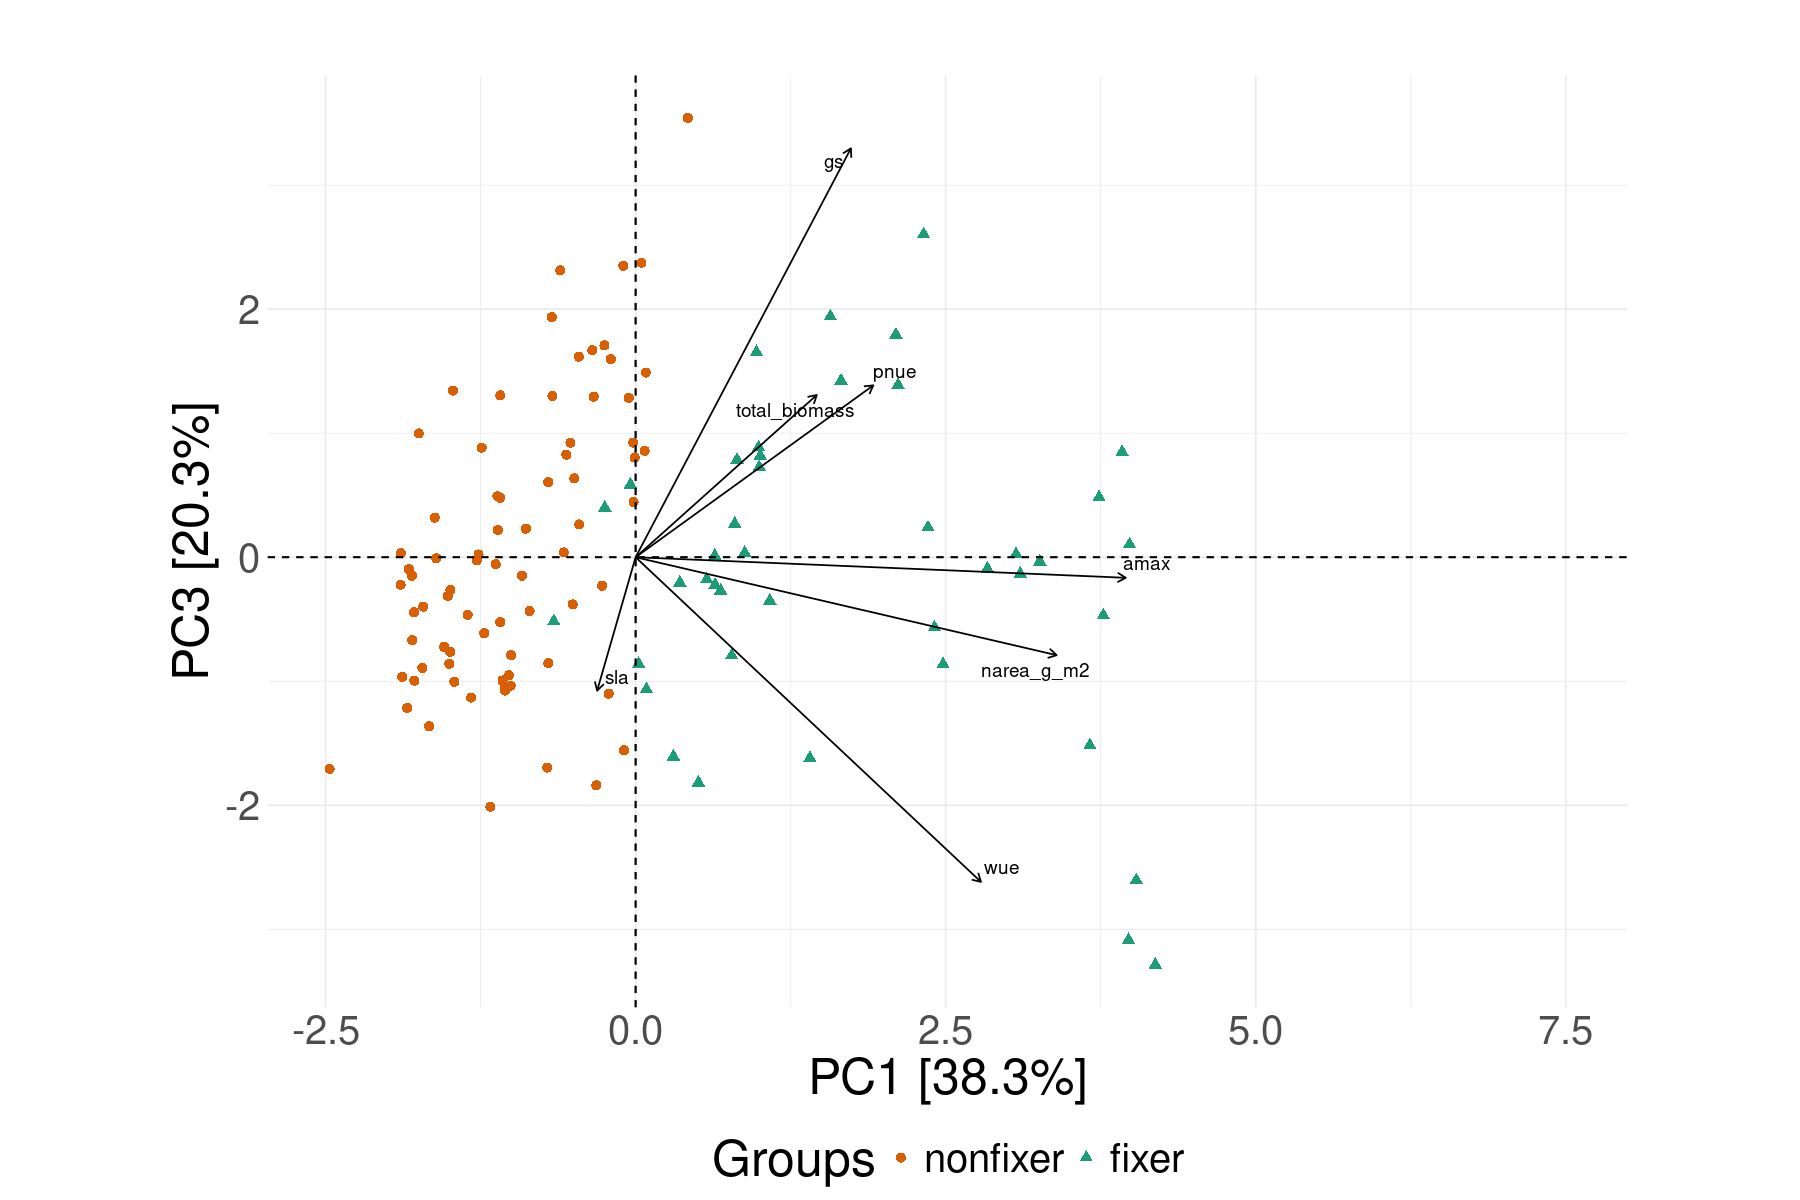

In [20]:
fviz_pca_biplot(pca_traits, axes = c(1, 3),

                invisible="quali",
                pointsize = 2.5,
                # Add group
                habillage= data_for_models$nfixer,

                # Set labels
                label ="var",

                # Set arrow color
                col.var = "black",
                geom=c("point", "arrows"),

                # Repel overlapping labels
                repel = TRUE) +

  theme_minimal() + xlim(NA, 7.5) +  labs(title = "")+
  coord_fixed() + theme(text = element_text(size = 30))+
  xlab(paste0("PC1 [", round(100*eigs[1], 1), "%]")) +
  ylab(paste0("PC3 [", round(100*eigs[3], 1), "%]")) +

  scale_shape_manual(values = c(16, 17)) +
  scale_color_manual(values = c("#D95F02","#1B9E77" )) +
  scale_fill_manual(values = c("#D95F02","#1B9E77")) +
  theme(legend.position = "bottom")

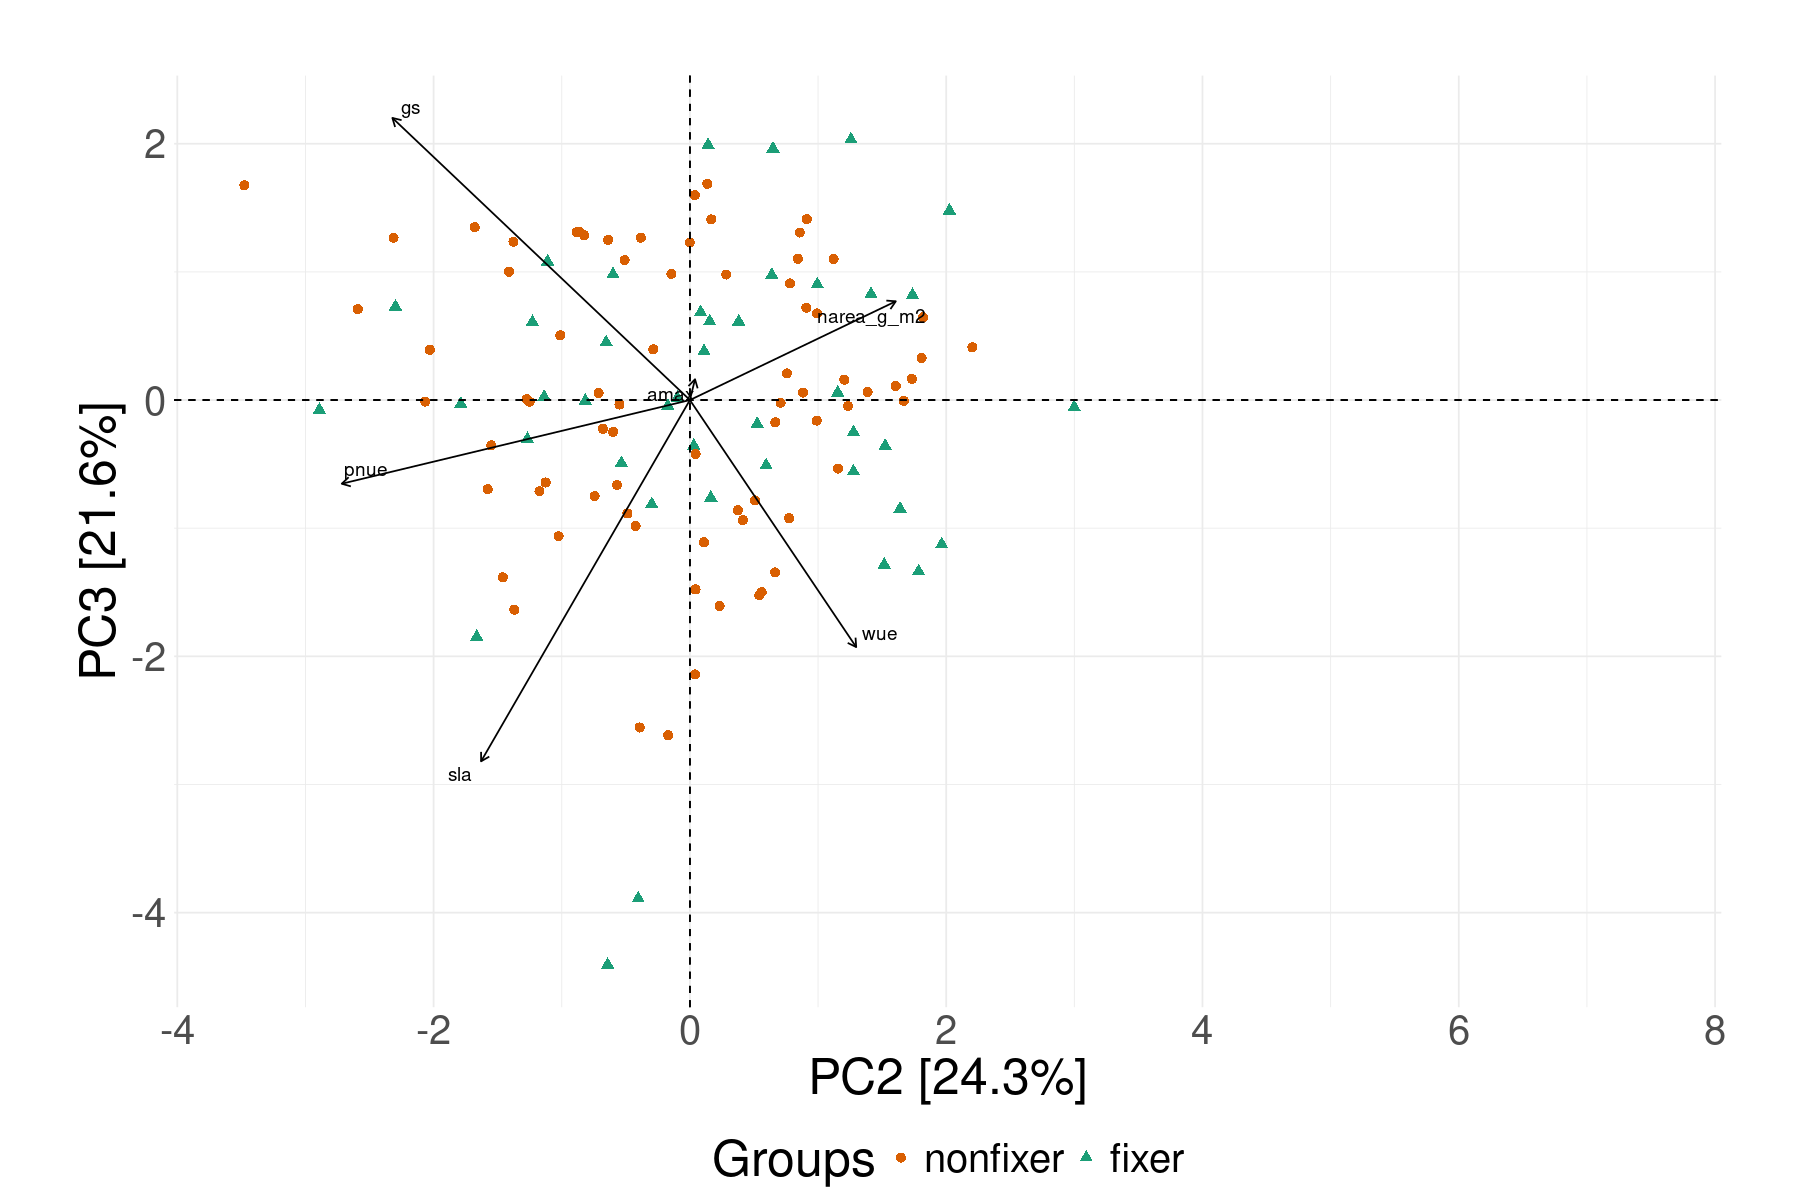

In [13]:
fviz_pca_biplot(pca_traits, axes = c(2,3),

                invisible="quali",
                pointsize = 2.5,
                # Add group
                habillage= data_for_models$nfixer,

                # Set labels
                label ="var",

                # Set arrow color
                col.var = "black",
                geom=c("point", "arrows"),

                # Repel overlapping labels
                repel = TRUE) +

  theme_minimal() + xlim(NA, 7.5) +  labs(title = "")+
  coord_fixed() + theme(text = element_text(size = 30))+
  xlab(paste0("PC2 [", round(100*eigs[2], 1), "%]")) +
  ylab(paste0("PC3 [", round(100*eigs[3], 1), "%]")) +

  scale_shape_manual(values = c(16, 17)) +
  scale_color_manual(values = c("#D95F02","#1B9E77" )) +
  scale_fill_manual(values = c("#D95F02","#1B9E77")) +
  theme(legend.position = "bottom")

In [14]:
# Extract loadings
pca_traits$loadings


Loadings:
           Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
amax        0.612                       0.335  0.713
gs          0.254 -0.523  0.525  0.296 -0.546       
wue         0.448  0.292 -0.460 -0.264 -0.657       
pnue        0.312 -0.612 -0.156 -0.549  0.288 -0.345
sla               -0.367 -0.673  0.640              
narea_g_m2  0.512  0.362  0.184  0.359  0.269 -0.609

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

## Biplots interpretation
[PCA interpretation](https://wilkelab.org/SDS375/slides/dimension-reduction-1.html#18)

+ The first 3 PCs explains 81% (47.9,19.4,15.8) of the variability in the data
+ PC1 separates fixers from non-fixers
+ All traits contribute positively to PC1

+ PC1 represents the overall high photosynthetic capacity
+ PC2 represents the difference between stomatal conductance and
+ PC3 represents the difference between d13c and